# Homework 16: Logistic regression
**Conditions**: build logistic regression mode using sklearn libraries.
Try different regularizations and processings and choose better one

**Goal**: learn how to use logistic regression

**Acceptance criteria**: workable logistic regression

Importing the needed libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures

Loading diabetes dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=names)

# Raw data analysis

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Check For Missing Value

In [5]:
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Duplicate",data.duplicated().sum(),True)
info.insert(3,"Unique",data.nunique(),True)
info.insert(4,"Min",data.min(),True)
info.insert(5,"Max",data.max(),True)
info.T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
IsNull,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
IsNa,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
Duplicate,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
Unique,17.0,136.0,47.0,51.0,186.0,248.0,517.000,52.0,2.0
Min,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
Max,17.0,199.0,122.0,99.0,846.0,67.1,2.420,81.0,1.0


Simple logic check

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


First Glance Questions:
1. Pregnancies: Number of times pregnant
Pregnancies max = 17 => can one woman have 17 children? Probably
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Glucose min = 0 => impossible
3. BloodPressure: Diastolic blood pressure (mm Hg)
BloodPressure min = 0 => impossible
4. SkinThickness: Triceps skin fold thickness (mm)
SkinThickness min = 0 => impossible
5. Insulin: 2-Hour serum insulin (mu U/ml)
Insulin min = 0 => impossible
6. BMI: Body mass index (weight in kg/(height in m)^2)
BMI min = 0 => impossible
7. Diabetes pedigree function
Not sure what it is but looks fine
8. Age (years) looks ok

Conclusion: zero values of Glucose, BloodPressure, SkinThickness, Insulin, BMI can be replaced with median

In [7]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    median = data[col].median()
    data.loc[data[col]<=0,col] = median

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA

1. Correlations

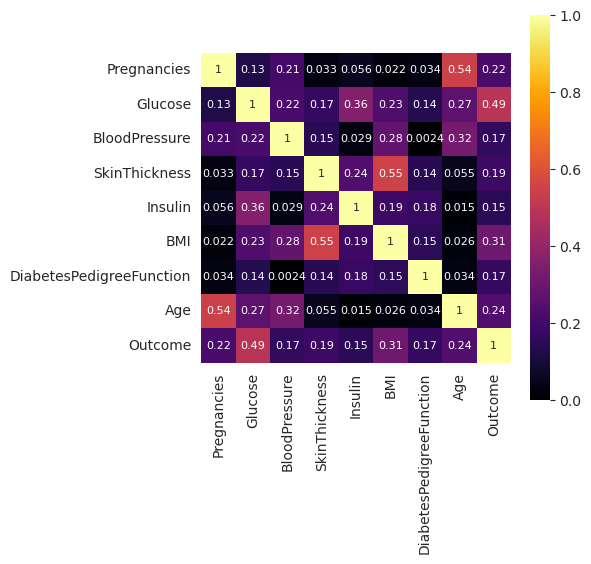

In [9]:
corr = data.corr()
plt.subplots(figsize=(5, 5))
sns.heatmap(
    abs(corr),
    vmax=1.0, vmin=0.0,
    annot=True, annot_kws={'size': 8},
    square=True, cmap='inferno'
)
plt.show()

Conclusion: no high correlations between any features

2. Distribution

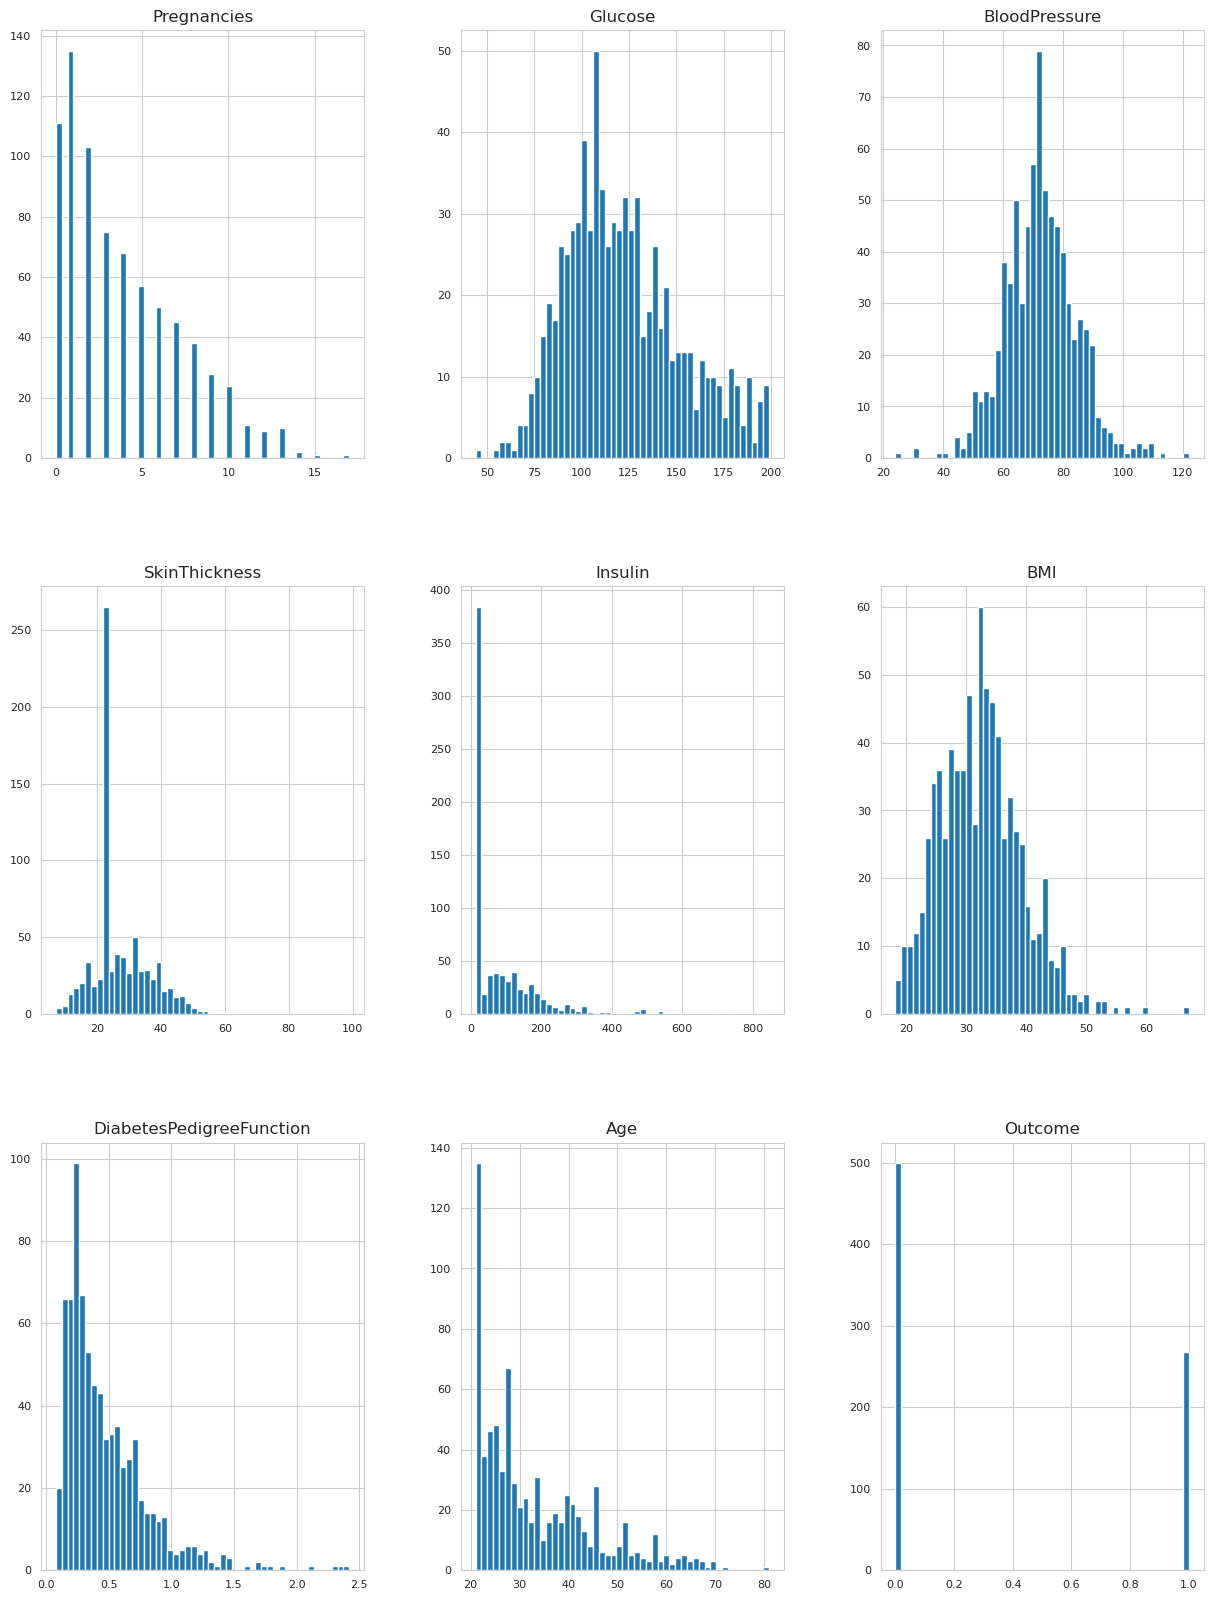

In [10]:
data.hist(xlabelsize=8, ylabelsize=8, figsize=(15, 20), bins=50)
plt.show()

Conclusin: All features need to be normalized

# Model

Spliting the data and target into training/testing sets

In [12]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [14]:
# create lists of possible realizations and processings to use with a loop
penalty_list = ['l1', 'l2']
process_list = [StandardScaler(), MinMaxScaler(), PowerTransformer(), PolynomialFeatures()]

Creating logstic regressions with different params and normalization
Calculating metrics (MSE, MAE, RMSE, Accuracy) -> save results to empty list

In [16]:
output_list = []
for pen in penalty_list:
    for proc in process_list:
        middle = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = proc.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        model = LogisticRegression(penalty = pen, C=1.0, solver='liblinear')
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        MAE = metrics.mean_absolute_error(y_test,y_pred)
        MSE = metrics.mean_squared_error(y_test,y_pred)
        ACC = metrics.accuracy_score(y_test,y_pred)
        rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

        middle.append(pen)
        middle.append(proc.__class__.__name__)
        middle.append(MSE)
        middle.append(MAE)
        middle.append(rmse)
        middle.append(ACC)

        output_list.append(middle)

        #print(f'Conditions: {pen} - {proc.__class__.__name__}\nMSE = {MSE}\nMAE = {MAE}\nRMSE = {rmse}\nAccuracy = {ACC}\n\n')


/home/dzmitry/anaconda3/envs/teachme/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [17]:
# function to create a table for each metric
def build_table(i):
    df = pd.DataFrame(columns = ['Regularization', 'StandardScaler', 'MinMaxScaler', 'PowerTransformer', 'PolynomialFeatures'])

    df = df.append({'Regularization': 'l1', 'StandardScaler' : output_list[0][i], 'MinMaxScaler' : output_list[1][i], 'PowerTransformer': output_list[2][i], 'PolynomialFeatures': output_list[3][i]}, ignore_index = True)

    df = df.append({'Regularization': 'l2', 'StandardScaler' : output_list[4][i], 'MinMaxScaler' : output_list[5][i], 'PowerTransformer': output_list[6][i], 'PolynomialFeatures': output_list[7][i]}, ignore_index = True)

    return df

In [18]:
#MSE
build_table(2)

/tmp/ipykernel_6309/2742156374.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Regularization': 'l1', 'StandardScaler' : output_list[0][i], 'MinMaxScaler' : output_list[1][i], 'PowerTransformer': output_list[2][i], 'PolynomialFeatures': output_list[3][i]}, ignore_index = True)
/tmp/ipykernel_6309/2742156374.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Regularization': 'l2', 'StandardScaler' : output_list[4][i], 'MinMaxScaler' : output_list[5][i], 'PowerTransformer': output_list[6][i], 'PolynomialFeatures': output_list[7][i]}, ignore_index = True)


,Regularization,StandardScaler,MinMaxScaler,PowerTransformer,PolynomialFeatures
0,l1,0.233766,0.220779,0.24026,0.246753
1,l2,0.233766,0.227273,0.24026,0.246753


In [19]:
#MAE
build_table(3)

/tmp/ipykernel_6309/2742156374.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Regularization': 'l1', 'StandardScaler' : output_list[0][i], 'MinMaxScaler' : output_list[1][i], 'PowerTransformer': output_list[2][i], 'PolynomialFeatures': output_list[3][i]}, ignore_index = True)
/tmp/ipykernel_6309/2742156374.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Regularization': 'l2', 'StandardScaler' : output_list[4][i], 'MinMaxScaler' : output_list[5][i], 'PowerTransformer': output_list[6][i], 'PolynomialFeatures': output_list[7][i]}, ignore_index = True)


,Regularization,StandardScaler,MinMaxScaler,PowerTransformer,PolynomialFeatures
0,l1,0.233766,0.220779,0.24026,0.246753
1,l2,0.233766,0.227273,0.24026,0.246753


In [20]:
#RMSE
build_table(4)

/tmp/ipykernel_6309/2742156374.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Regularization': 'l1', 'StandardScaler' : output_list[0][i], 'MinMaxScaler' : output_list[1][i], 'PowerTransformer': output_list[2][i], 'PolynomialFeatures': output_list[3][i]}, ignore_index = True)
/tmp/ipykernel_6309/2742156374.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Regularization': 'l2', 'StandardScaler' : output_list[4][i], 'MinMaxScaler' : output_list[5][i], 'PowerTransformer': output_list[6][i], 'PolynomialFeatures': output_list[7][i]}, ignore_index = True)


,Regularization,StandardScaler,MinMaxScaler,PowerTransformer,PolynomialFeatures
0,l1,0.483494,0.469871,0.490163,0.496743
1,l2,0.483494,0.476731,0.490163,0.496743


In [21]:
#Accuracy
build_table(5)

/tmp/ipykernel_6309/2742156374.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Regularization': 'l1', 'StandardScaler' : output_list[0][i], 'MinMaxScaler' : output_list[1][i], 'PowerTransformer': output_list[2][i], 'PolynomialFeatures': output_list[3][i]}, ignore_index = True)
/tmp/ipykernel_6309/2742156374.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Regularization': 'l2', 'StandardScaler' : output_list[4][i], 'MinMaxScaler' : output_list[5][i], 'PowerTransformer': output_list[6][i], 'PolynomialFeatures': output_list[7][i]}, ignore_index = True)


,Regularization,StandardScaler,MinMaxScaler,PowerTransformer,PolynomialFeatures
0,l1,0.766234,0.779221,0.75974,0.753247
1,l2,0.766234,0.772727,0.75974,0.753247


# Conclusion
1. Not much difference between l1 and l2
2. MinMaxScaler gave the best accuracy (based on l1)